# House Price
## Objective/Goal
To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

# 1. Importing the needed libraries

In [65]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as MSE, r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score as RMSE 
from sklearn.ensemble import GradientBoostingClassifier
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder, DecisionTreeEncoder
from feature_engine import encoding as ce
from feature_engine.encoding import WoEEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.discretisation import EqualFrequencyDiscretiser, EqualWidthDiscretiser 
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures 
from feature_engine.selection import SmartCorrelatedSelection

from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV 

from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix

import scipy.stats as stats

In [66]:
def diagnostic_plots(data, variable):
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 3, 1)
    data[variable].hist()
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist = 'norm', plot = plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y = data[variable])
    plt.title("Boxplot")
    
    plt.show()

# 2. Loading the dataset

In [46]:
# Import Dataset
data = pd.read_csv('../houseprice.csv')

In [47]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
Data fields
the data description.

SalePrice - the property sale price in dollars. This is the target variable that you are trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [60]:
data.tail()

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


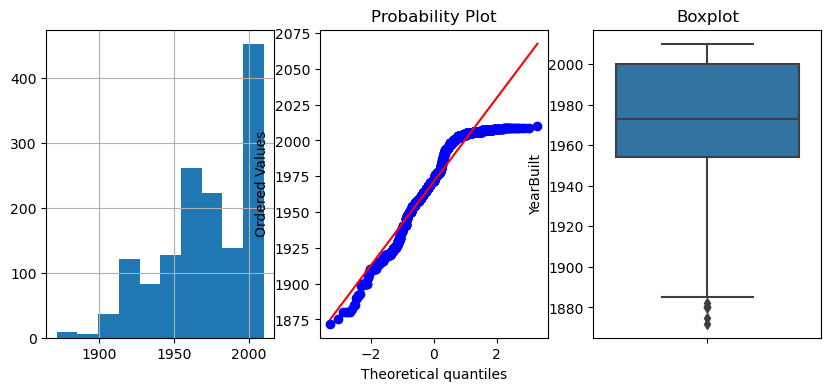

In [67]:
diagnostic_plots(data, 'YearBuilt')

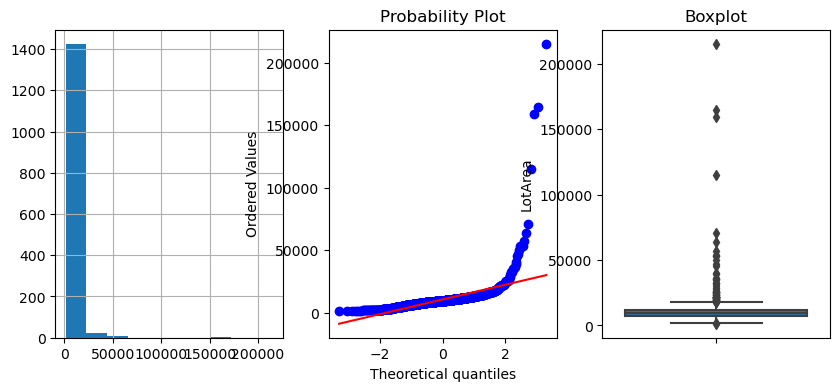

In [68]:
diagnostic_plots(data, 'LotArea')

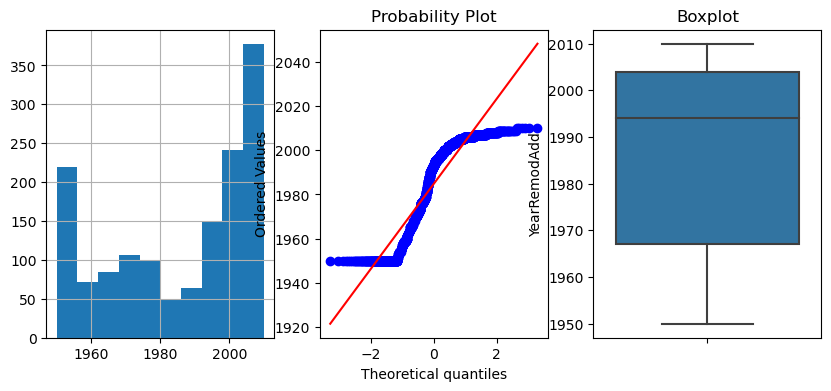

In [70]:
diagnostic_plots(data, 'YearRemodAdd')

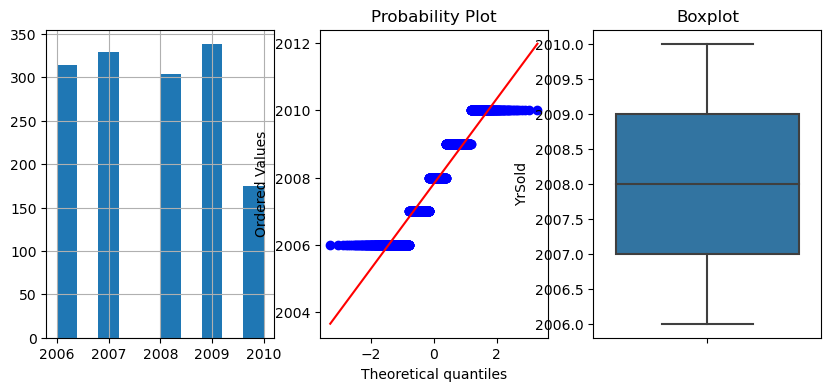

In [71]:
diagnostic_plots(data, 'YrSold')

# 3.Feature enginering

In [49]:
# Check for null values
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [50]:
# Lots of empty values, so we're removing them
# 93% NA
del data ['Alley']
# 47% NA 
del data ['FireplaceQu'] 
# 99% NA 
del data ['PoolQC']
# 80% NA 
del data ['Fence']
# 96% NA
del data ['MiscFeature']
# There are no meanings
del data ['MSZoning']

In [52]:
#Divide to our dataset into train and test 
x_train, x_test, y_train, y_test = train_test_split(data.drop(labels = ['SalePrice', 'Id'], axis = 1),
                                                   data.SalePrice,
                                                   test_size=0.3,
                                                   random_state=0)
x_train.shape, x_test.shape

((1022, 73), (438, 73))

In [53]:
x_train

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
64,60,NaN,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,36,0,0,0,0,0,2,2009,WD,Normal
682,120,NaN,2887,Pave,Reg,HLS,AllPub,Inside,Gtl,ClearCr,...,0,0,0,0,0,0,11,2008,WD,Normal
960,20,50.0,7207,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,...,0,0,0,0,0,0,2,2010,WD,Normal
1384,50,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,0,0,10,2009,WD,Normal
1100,30,60.0,8400,Pave,Reg,Bnk,AllPub,Inside,Gtl,SWISU,...,0,0,0,0,0,0,1,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,Pave,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,...,128,0,0,180,0,0,7,2009,WD,Normal
835,20,60.0,9600,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,0,0,0,0,2,2010,WD,Normal
1216,90,68.0,8930,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0,0,0,0,0,0,4,2010,WD,Normal
559,120,NaN,3196,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,...,20,0,0,0,0,0,10,2006,WD,Normal


In [54]:
x_test

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
529,20,NaN,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,...,0,200,0,0,0,0,3,2007,WD,Alloca
491,50,79.0,9490,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,32,0,0,0,0,8,2006,WD,Normal
459,50,NaN,7015,Pave,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,...,0,248,0,0,0,0,7,2009,WD,Normal
279,60,83.0,10005,Pave,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,...,117,0,0,0,0,0,3,2008,WD,Normal
655,160,21.0,1680,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,...,0,0,0,0,0,0,3,2010,WD,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,20,73.0,39104,Pave,IR1,Low,AllPub,CulDSac,Sev,ClearCr,...,0,0,0,0,0,0,4,2008,WD,Normal
445,20,73.0,9855,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,...,0,0,0,0,0,0,11,2009,COD,Normal
654,20,91.0,10437,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,...,46,0,0,0,0,0,8,2008,WD,Normal
1280,20,67.0,9808,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,72,0,0,0,0,0,3,2009,WD,Normal


In [56]:
# Check for null values in train
for var in x_train.columns:
    if x_train[var].isnull().sum() > 0:
        print(var, x_train[var].isnull().mean())

LotFrontage 0.18493150684931506
MasVnrType 0.004892367906066536
MasVnrArea 0.004892367906066536
BsmtQual 0.023483365949119372
BsmtCond 0.023483365949119372
BsmtExposure 0.023483365949119372
BsmtFinType1 0.023483365949119372
BsmtFinType2 0.02446183953033268
Electrical 0.0009784735812133072
GarageType 0.05283757338551859
GarageYrBlt 0.05283757338551859
GarageFinish 0.05283757338551859
GarageQual 0.05283757338551859
GarageCond 0.05283757338551859


In [57]:
# Check for null values in test
for var in x_test.columns:
    if x_test[var].isnull().sum() > 0:
        print(var, x_test[var].isnull().mean())

LotFrontage 0.1598173515981735
MasVnrType 0.00684931506849315
MasVnrArea 0.00684931506849315
BsmtQual 0.02968036529680365
BsmtCond 0.02968036529680365
BsmtExposure 0.0319634703196347
BsmtFinType1 0.02968036529680365
BsmtFinType2 0.02968036529680365
GarageType 0.06164383561643835
GarageYrBlt 0.06164383561643835
GarageFinish 0.06164383561643835
GarageQual 0.06164383561643835
GarageCond 0.06164383561643835


In [18]:
print(x_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.values)

['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold']


In [19]:
# numerical variables
numerical_train = x_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.values

In [20]:
numerical_train

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [21]:
print(x_train.select_dtypes(include = ['object']).columns.values)

['Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' 'KitchenQual' 'Functional' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType' 'SaleCondition']


In [22]:
# categorical variables
categorical_train = x_train.select_dtypes(include = ['object']).columns.values

In [23]:
categorical_train

array(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

# 4. Dataset preprocessing

In [24]:
data.corr(method = "spearman")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.019226,-0.033335,-0.005364,-0.028771,0.003622,-0.005130,-0.011680,-0.035507,-0.013038,...,-0.043239,-0.003225,-0.006758,-0.036706,0.005962,0.055555,-0.043383,0.019018,0.001526,-0.018546
MSSubClass,0.019226,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,...,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.033335,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,...,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.005364,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,...,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,-0.028771,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,...,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,0.003622,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,...,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,-0.005130,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,...,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,-0.011680,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,...,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,-0.035507,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,...,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.013038,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,...,0.179359,0.081420,-0.148339,0.046802,0.071989,0.057586,0.005097,-0.016405,0.020793,0.301871


<AxesSubplot:>

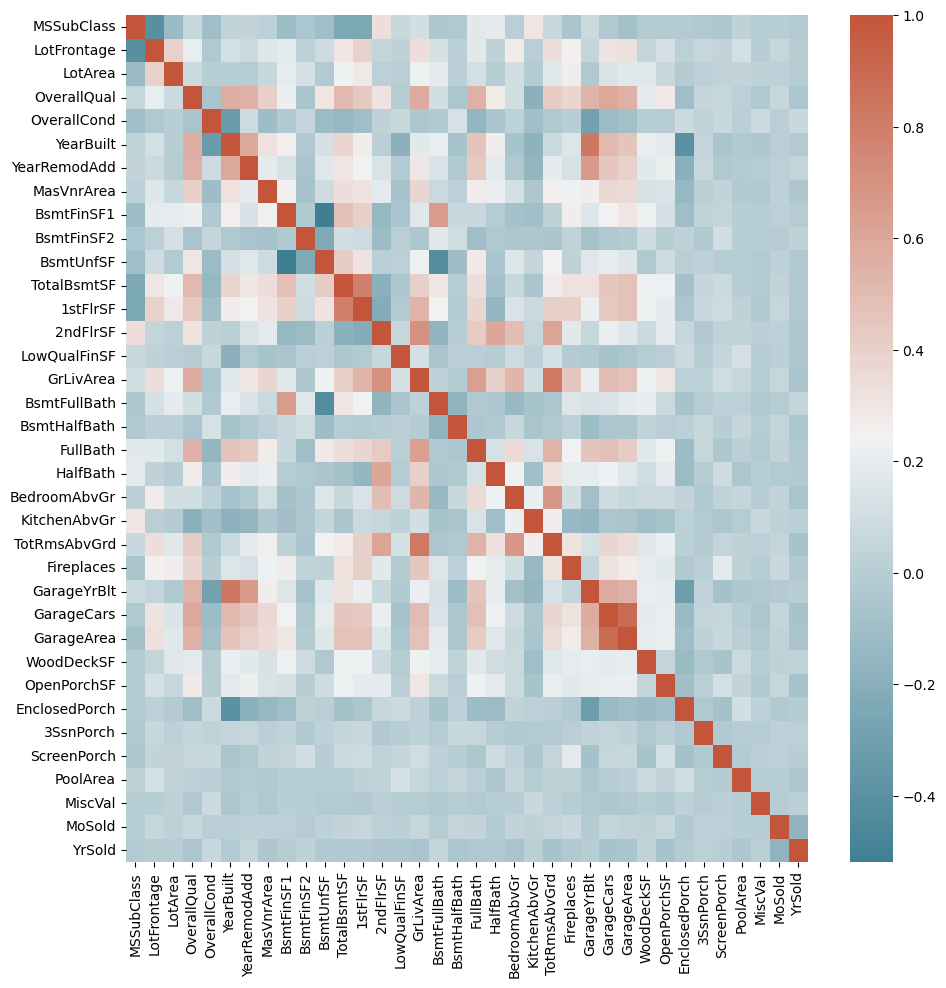

In [25]:
# Show correlation matrix
corrmat = x_train.corr(method = 'pearson')
cmap = sns.diverging_palette(220, 20, as_cmap = True)
fig, ax =plt.subplots()
fig.set_size_inches(11, 11)
sns.heatmap(corrmat, cmap = cmap, annot = None, linewidths=0)

##### Let’s have a more general view on the top 8 correlated features with the sale price|

In [26]:
# Check the labels
for col in x_train.columns:
    print(col, ': ', len(x_train[col].unique()), 'labels')

MSSubClass :  15 labels
LotFrontage :  102 labels
LotArea :  790 labels
Street :  2 labels
LotShape :  4 labels
LandContour :  4 labels
Utilities :  2 labels
LotConfig :  5 labels
LandSlope :  3 labels
Neighborhood :  25 labels
Condition1 :  9 labels
Condition2 :  5 labels
BldgType :  5 labels
HouseStyle :  8 labels
OverallQual :  10 labels
OverallCond :  9 labels
YearBuilt :  107 labels
YearRemodAdd :  61 labels
RoofStyle :  6 labels
RoofMatl :  6 labels
Exterior1st :  15 labels
Exterior2nd :  16 labels
MasVnrType :  5 labels
MasVnrArea :  262 labels
ExterQual :  4 labels
ExterCond :  5 labels
Foundation :  6 labels
BsmtQual :  5 labels
BsmtCond :  5 labels
BsmtExposure :  5 labels
BsmtFinType1 :  7 labels
BsmtFinSF1 :  503 labels
BsmtFinType2 :  7 labels
BsmtFinSF2 :  113 labels
BsmtUnfSF :  627 labels
TotalBsmtSF :  573 labels
Heating :  6 labels
HeatingQC :  5 labels
CentralAir :  2 labels
Electrical :  6 labels
1stFlrSF :  617 labels
2ndFlrSF :  326 labels
LowQualFinSF :  18 label

In [72]:
numeric_vars = [var for var in x_train.columns if x_train[var].dtypes !='O'
               and var != 'SalePrice']

In [73]:
# Check discrete numerical variables
discrete = [var for var in x_train.columns if x_train[var].dtypes !='O'
           and var !='SalePrice' and x_train[var].nunique() <20]

In [74]:
num_list_1 = [var for var in numeric_vars if var not in discrete
           and var not in ['Id','SalePrice']]

In [75]:
# Create numerical list
num_list = num_list_1 + discrete

In [80]:
categorical_vars = [var for var in x_train.columns if x_train[var].dtype == 'O']  

In [81]:
# Create categorical list
cat_list = categorical_vars 

In [82]:
x_train[cat_list] = x_train[cat_list].astype('O')

In [83]:
x_test[cat_list] = x_test[cat_list].astype('O')

In [84]:
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [85]:
# Scaling our variables
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [86]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# 5. Create pipeline

In [87]:
# Decision Tree Regression
pipe_dtr = Pipeline([('imputer_num', MeanMedianImputer(imputation_method= 'median', variables=num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables=cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3)),
                 ('discretiser', EqualFrequencyDiscretiser (q = 6, return_object = True, variables=num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)),
                 ('constant', DropConstantFeatures(tol = 0.998, missing_values ='raise')),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('DTR', DecisionTreeRegressor(random_state= 0))])
               

In [88]:
# Finding the best parameters
dtr_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'encoder__encoding_method': ['ordered', 'arbitrary'],
    'discretiser__q': [5, 6, 7],
    'DTR__max_depth': [2, 3, 4, 5], 
    'DTR__criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']
}]

In [89]:
dtr_grid_search = GridSearchCV(estimator=pipe_dtr, param_grid = dtr_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [90]:
dtr_grid_search.fit(x_train, y_train)

C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
624 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
192 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\82103\ana

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
                                                                     '2ndFlrSF',
                  

In [91]:
#Show the results for train and test
print("{} R2 score train set:{}".format('Decision Tree Regressor', dtr_grid_search.score(x_train, y_train)))
print("{} R2 score test set:{}".format('Decision Tree Regressor', dtr_grid_search.score(x_test, y_test)))

Decision Tree Regressor R2 score train set:0.8405925992844498
Decision Tree Regressor R2 score test set:0.7266770860259311


In [92]:
dtr_grid_search.best_params_

{'DTR__criterion': 'absolute_error',
 'DTR__max_depth': 5,
 'discretiser__q': 7,
 'encoder__encoding_method': 'arbitrary',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [93]:
# KNeighbors Regression
pipe_knn = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)),
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998, variables = num_list + cat_list)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('KNN', KNeighborsRegressor())])

In [94]:
knn_param_grid = {
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'encoder__encoding_method': ['ordered', 'arbitrary'],
    'discretiser__bins': [8, 10, 12, 14],
    'KNN__weights': ['uniform', 'distance'], 
    'KNN__n_neighbors': [3, 5, 7, 9, 11],
    'KNN__metric': ['minkowski', 'euclidean'], 
    'KNN__leaf_size': [3, 4, 5, 7, 10, 30]
}

In [95]:
knn_grid_search = GridSearchCV(estimator = pipe_knn, param_grid = knn_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [96]:
knn_grid_search.fit(x_train, y_train)

C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1920 fits failed out of a total of 19200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\82103\

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [97]:
print("{} R2 score train set:{}".format('KNN', knn_grid_search.score(x_train, y_train)))
print("{} R2 score test set:{}".format('KNN', knn_grid_search.score(x_test, y_test)))

KNN R2 score train set:0.9999954884148593
KNN R2 score train set:0.7525145997169074


In [98]:
knn_grid_search.best_params_

{'KNN__leaf_size': 3,
 'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 5,
 'KNN__weights': 'distance',
 'discretiser__bins': 10,
 'encoder__encoding_method': 'ordered',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [99]:
pipe_lr = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)), 
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998, variables = num_list + cat_list)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('LR', LinearRegression())])


In [100]:
# Linear Regression
lr_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'discretiser__bins': [8, 10, 12, 14],
    'encoder__encoding_method': ['ordered', 'arbitrary'],
    'LR__fit_intercept': [True, False], 
    'LR__copy_X': [True, False], 
    'LR__n_jobs': [-1, None],
}]

In [101]:
lr_grid_search = GridSearchCV(estimator=pipe_lr, param_grid = lr_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [102]:
lr_grid_search.fit(x_train, y_train)

C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
128 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
128 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\82103\ana

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [103]:
print("{} R2 score train set:{}".format('Linear Regression', lr_grid_search.score(x_train, y_train)))
print("{} R2 score test set:{}".format('Linear Regression', lr_grid_search.score(x_test, y_test)))

Linear Regression R2 score train set:0.8835461263970219
Linear Regression R2 score train set:0.7842981256931201


In [104]:
lr_grid_search.best_params_

{'LR__copy_X': True,
 'LR__fit_intercept': True,
 'LR__n_jobs': -1,
 'discretiser__bins': 14,
 'encoder__encoding_method': 'arbitrary',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [105]:
# Lasso
pipe_lasso = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OneHotEncoder()),
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('Lasso', Lasso (random_state = 0))])
               

In [106]:
lasso_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'encoder__top_categories': [5, 7, 10, None],
    'discretiser__bins': [8, 10, 12],
    'Lasso__alpha': (1, 0),
    'Lasso__max_iter': [10, 100, 1000]
}]

In [107]:
lasso_grid_search = GridSearchCV(estimator=pipe_lasso, param_grid = lasso_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [108]:
lasso_grid_search.fit(x_train, y_train)

C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
144 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\82103\ana

C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\82103\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.112e+01, tolerance: 1.022e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [109]:
print("{} R2 score train set:{}".format('Lasso', lasso_grid_search.score(x_train, y_train)))
print("{} R2 score test set:{}".format('Lasso', lasso_grid_search.score(x_test, y_test)))

Lasso R2 score train set:0.8999568415132896
Lasso R2 score train set:0.7997816371581695


C:\Users\82103\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\82103\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"{feature}_{category}"] = np.where(X[feature] == category, 1, 0)
C:\Users\82103\anaconda3\lib\site-packages\feature_engine\encoding\one_hot.py:267: PerformanceWarning: DataFrame is highly fragmented.  This

In [110]:
lasso_grid_search.best_params_

{'Lasso__alpha': 0,
 'Lasso__max_iter': 1000,
 'discretiser__bins': 12,
 'encoder__top_categories': 5,
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [111]:
# XGBRegression
pipe_xgb = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)),
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('XGB', XGBRegressor (random_state = 0))])

In [112]:
xgb_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'discretiser__bins': [8, 10, 12],
    'encoder__encoding_method': ['arbitrary', 'ordered'],
    'XGB__n_estimators': [100, 150], 
    'XGB__max_depth': [2, 3, 4, 5], 
    'XGB__learning_rate': [0.01, 0.05, 1] 
}]

In [113]:
xgb_grid_search = GridSearchCV(estimator=pipe_xgb, param_grid = xgb_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [114]:
xgb_grid_search.fit(x_train, y_train)

C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\82103\ana

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [115]:
print("{} R2 score train set:{}".format('XGB', xgb_grid_search.score(x_train, y_train)))
print("{} R2 score test set:{}".format('XGB', xgb_grid_search.score(x_test, y_test)))

XGB R2 score train set:0.9848484128636575
XGB R2 score train set:0.866940196274975


In [116]:
xgb_grid_search.best_params_

{'XGB__learning_rate': 0.05,
 'XGB__max_depth': 5,
 'XGB__n_estimators': 150,
 'discretiser__bins': 10,
 'encoder__encoding_method': 'ordered',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

In [117]:
# Suppor Vector Regression
pipe_svr = Pipeline([('imputer_num', MeanMedianImputer(imputation_method='mean', variables = num_list)),
                 ('imputer_cat', CategoricalImputer(imputation_method= 'frequent', variables = cat_list)),
                 ('rare_label', RareLabelEncoder(tol = 0.05, n_categories = 3, variables = cat_list)),
                 ('discretiser', EqualWidthDiscretiser(bins = 10, variables = num_list)),
                 ('encoder', OrdinalEncoder(variables= cat_list)),
                 ('scaler', SklearnTransformerWrapper(transformer= StandardScaler(), variables = num_list)),
                 ('constant', DropConstantFeatures(tol = 0.998)),
                 ('duplicated', DropDuplicateFeatures()),
                 ('correlated', SmartCorrelatedSelection(selection_method = 'variance')),
                 ('SVR', SVR ())])

In [118]:
svr_param_grid = [{
    'imputer_num__imputation_method':['mean','median'],
    'imputer_cat__imputation_method':['frequent', 'missing'],
    'encoder__encoding_method': ['ordered', 'arbitrary'],
    'discretiser__bins': [8, 10, 12],
    'SVR__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'SVR__gamma' : ['auto','scale']
}]

In [119]:
svr_grid_search = GridSearchCV(estimator=pipe_svr, param_grid = svr_param_grid, cv = 5, n_jobs = -1, scoring = 'r2')

In [120]:
svr_grid_search.fit(x_train, y_train)

C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\82103\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\82103\anacon

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer_num',
                                        MeanMedianImputer(imputation_method='mean',
                                                          variables=['LotFrontage',
                                                                     'LotArea',
                                                                     'YearBuilt',
                                                                     'YearRemodAdd',
                                                                     'MasVnrArea',
                                                                     'BsmtFinSF1',
                                                                     'BsmtFinSF2',
                                                                     'BsmtUnfSF',
                                                                     'TotalBsmtSF',
                                                                     '1stFlrSF',
               

In [121]:
print("{} R2 score train set:{}".format('SVR', svr_grid_search.score(x_train, y_train)))
print("{} R2 score test set:{}".format('SVR', svr_grid_search.score(x_test, y_test)))

SVR R2 score train set:0.9235642598979148
SVR R2 score test set:0.8141522892982977


In [122]:
svr_grid_search.best_params_

{'SVR__gamma': 'scale',
 'SVR__kernel': 'rbf',
 'discretiser__bins': 10,
 'encoder__encoding_method': 'ordered',
 'imputer_cat__imputation_method': 'missing',
 'imputer_num__imputation_method': 'mean'}

# Conclusion

### We did data analysis, found empty values, replaced them, replaced the numerical and categorical values, encoded, found correlating variables, created a pipeline, and trained regression models. 
### Tools Used
Mean Median Imputer Categorical Imputer RareLabel Encoder EqualWidth Discretiser One Hot Encoder Sklearn TransformerWrapper Drop Constant Features Smart Correlated Selection Standard Scaler
### Models Used
KNeighbors Regression,

Linear Regression,

Lasso,

XGB Regression,

Support Vector Regression
####  The best XGB model the results is train set score 98% and test 86%.